# Desafio 5

Neste desafio, vamos praticar sobre redução de dimensionalidade com PCA e seleção de variáveis com RFE. Utilizaremos o _data set_ [Fifa 2019](https://www.kaggle.com/karangadiya/fifa19), contendo originalmente 89 variáveis de mais de 18 mil jogadores do _game_ FIFA 2019.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
from math import sqrt

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats as st
from sklearn.decomposition import PCA

#from loguru import logger

In [2]:
fifa = pd.read_csv("fifa.csv")

In [3]:
#?pip install

In [4]:
columns_to_drop = ["Unnamed: 0", "ID", "Name", "Photo", "Nationality", "Flag",
                   "Club", "Club Logo", "Value", "Wage", "Special", "Preferred Foot",
                   "International Reputation", "Weak Foot", "Skill Moves", "Work Rate",
                   "Body Type", "Real Face", "Position", "Jersey Number", "Joined",
                   "Loaned From", "Contract Valid Until", "Height", "Weight", "LS",
                   "ST", "RS", "LW", "LF", "CF", "RF", "RW", "LAM", "CAM", "RAM", "LM",
                   "LCM", "CM", "RCM", "RM", "LWB", "LDM", "CDM", "RDM", "RWB", "LB", "LCB",
                   "CB", "RCB", "RB", "Release Clause"
]

try:
   fifa.drop(columns_to_drop, axis=1, inplace=True)
except KeyError:
   logger.warning(f"Columns already dropped")

## Inicia sua análise a partir daqui

In [5]:
# Sua análise começa aqui.


## Questão 1

Qual fração da variância consegue ser explicada pelo primeiro componente principal de `fifa`? Responda como um único float (entre 0 e 1) arredondado para três casas decimais.

#### Análise de consistência das variáveis:

In [6]:
cons = pd.DataFrame({'colunas': fifa.columns, 
                    'tipo': fifa.dtypes,
                    'missing': fifa.isna().sum(),
                    'size': fifa.shape[0],
                    'unicos': fifa.nunique()})

cons['percentual'] = round(cons['missing'] / cons['size'],4)

#### Percentual de missing 

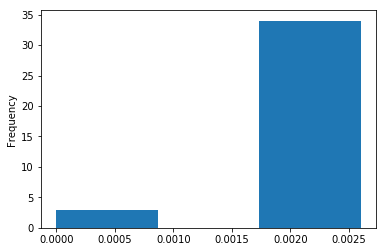

In [7]:
cons.percentual.plot.hist(bins = 3)

#### Remover valores missing

In [8]:
fifa.dropna(inplace = True)

In [9]:
#Inicializando o objeto PCA:
pca = PCA().fit(fifa)

In [10]:
def q1():
    return float(round(pca.explained_variance_ratio_[0],3))
q1()

0.565

## Questão 2

Quantos componentes principais precisamos para explicar 95% da variância total? Responda como un único escalar inteiro.

In [11]:
cumulative_evr = np.cumsum(pca.explained_variance_ratio_)
component_95 = np.argmax(cumulative_evr >=0.95) + 1
component_95=int(component_95)

#### Visualização por Screeplot

In [12]:
def q2():
    return component_95
q2()

15

## Questão 3

Qual são as coordenadas (primeiro e segundo componentes principais) do ponto `x` abaixo? O vetor abaixo já está centralizado. Cuidado para __não__ centralizar o vetor novamente (por exemplo, invocando `PCA.transform()` nele). Responda como uma tupla de float arredondados para três casas decimais.

In [13]:
x = [0.87747123,  -1.24990363,  -1.3191255, -36.7341814,
     -35.55091139, -37.29814417, -28.68671182, -30.90902583,
     -42.37100061, -32.17082438, -28.86315326, -22.71193348,
     -38.36945867, -20.61407566, -22.72696734, -25.50360703,
     2.16339005, -27.96657305, -33.46004736,  -5.08943224,
     -30.21994603,   3.68803348, -36.10997302, -30.86899058,
     -22.69827634, -37.95847789, -22.40090313, -30.54859849,
     -26.64827358, -19.28162344, -34.69783578, -34.6614351,
     48.38377664,  47.60840355,  45.76793876,  44.61110193,
     49.28911284
]

#### Expressar este vetor x, que equivale a uma observação, com 37 variáveis, em 2 componentes principais extraídos a partir da base de dados fifa

In [14]:
#Utilizaremos, portanto, apenas 2 componentes
pca = PCA(n_components=2)
pca.fit(fifa)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [15]:
#Já possuímos as duas combinações lineares das variáveis que representam a maior porcentagem da variância total. 
pca.components_

array([[-6.16388751e-03, -3.70623864e-02, -2.27401748e-02,
        -2.13639023e-01, -1.98891213e-01, -1.70828950e-01,
        -1.80309140e-01, -1.87038764e-01, -2.33139606e-01,
        -2.07690956e-01, -1.84764187e-01, -1.67186902e-01,
        -2.12972623e-01, -1.38740617e-01, -1.34902279e-01,
        -1.38433521e-01, -4.91611013e-02, -1.16410947e-01,
        -1.95840156e-01, -4.07181861e-02, -1.72711671e-01,
        -2.33585866e-02, -2.16594765e-01, -1.53339724e-01,
        -1.50834334e-01, -2.24571087e-01, -1.29586783e-01,
        -1.62548283e-01, -1.01038031e-01, -1.53454113e-01,
        -1.59617493e-01, -1.47955869e-01,  2.06147192e-01,
         1.96645602e-01,  1.91129889e-01,  1.97401130e-01,
         2.08994083e-01],
       [ 8.87203494e-03,  1.58367355e-04, -7.78142440e-03,
        -4.43084573e-02, -2.57629630e-01,  1.18911964e-01,
         1.21869793e-02, -1.91182282e-01, -1.18898465e-01,
        -1.27744634e-01, -1.00178915e-01,  4.89136910e-02,
        -5.12678591e-02, -9.84

#### Sabe-se que:
$$Z_{1} = \phi_{11}X_{1} + \phi_{21}X_{2} + \cdots + \phi_{p1}X_{p} = \sum_{1 \leq j \leq p} \phi_{j1}X_{j}$$

Portanto, basta multiplicar os loadings, ou seja, os coeficientes que expressam PC1 e PC2 em função de X1, X2, ... , Xn para obter as coordenadas de `x` nos novos componentes principais 

In [16]:
def q3():
    return tuple([round(x,3) for x in pca.components_.dot(x)])
q3()

(186.556, -6.592)

## Questão 4

Realiza RFE com estimador de regressão linear para selecionar cinco variáveis, eliminando uma a uma. Quais são as variáveis selecionadas? Responda como uma lista de nomes de variáveis.

In [17]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

X_train =fifa.drop(columns='Overall') 
y_train =fifa['Overall']

regressor.fit(X_train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
from sklearn.feature_selection import RFE


#step = 1  significa remover as variáveis uma a uma até chegar em 5, neste caso 
rfe = RFE(regressor, n_features_to_select=5, step = 1)

rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  n_features_to_select=5, step=1, verbose=0)

In [19]:
df_rfe = pd.DataFrame({'features':list(X_train),
                      'selecionadas':rfe.get_support()})

In [20]:
def q4():
    return list(df_rfe[df_rfe.selecionadas == True]['features'])
q4()

['Age', 'Potential', 'BallControl', 'Reactions', 'GKReflexes']